提出问题：泰坦尼克号的存活率是否有一定规律？
- 存活率是否和席别有关？
- 存活率是否和性别有关？
- 年龄的区间是否与存活率相关？
- 独自一人和有亲友相伴的存活率是否一致？

## 导入

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_name=pd.read_csv('G:/Files/Study/Udacity/Task2/titanic-data.csv')

population_all=len(file_name['PassengerId'])#不计算空缺的总人数
file_name.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Survived.1,female
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,7.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.0


In [22]:
file_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived.1     891 non-null int64
female         7 non-null float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.5+ KB


可以看出，在age，Cabin，Embarked中均存在缺失值，由于在分析过程中，分析pclass,sex,alone对存活率的影响均为单变量分析，其余值是否缺失对其不能造成很大影响，因此只需在单独计算age分组的存活率时处理缺失值即可，本次分析不考虑Cabin和Embarked，忽略。

__根据pclass计算存活率__

([<matplotlib.patches.Wedge at 0xd74dba8>,
  <matplotlib.text.Text at 0xd76c278>])

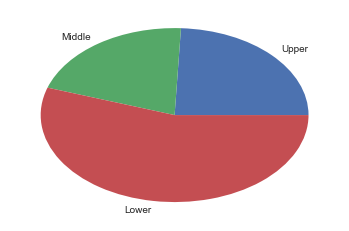

In [23]:
upper=(file_name['Pclass']==1).mean()
middle=(file_name['Pclass']==2).mean()
lower=(file_name['Pclass']==3).mean()
plt.pie([upper,middle,lower],labels=['Upper','Middle','Lower'])

Upper     0.629630
Middle    0.472826
Lower     0.242363
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.755)
[[ 1.         -0.33848104]
 [-0.33848104  1.        ]]


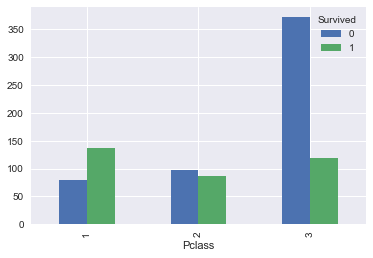

In [24]:
pclass_sur_ratio=file_name.groupby('Pclass').mean()['Survived']#之前根据存活为1，分布求和求总数，计算存活率，直接改为求平均值更有效
pclass_sur_ratio.index=('Upper','Middle','Lower')

print pclass_sur_ratio
print file_name.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar')
print np.corrcoef(file_name['Pclass'],file_name['Survived'])

可以看出，Upper票类的存活率比Middle高出15.68%，比lower高出38.73%，即票类席别等级越高，存活率越高，可能为席别高则保护措施更加完善。相关系数为-0.34，相关性较差。

__根据性别计算存活率__

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.755)


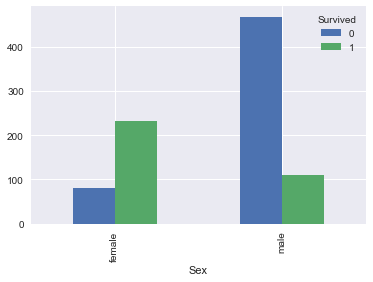

In [25]:
sex_sur_ratio=file_name.groupby('Sex').mean()['Survived']
print sex_sur_ratio
print file_name.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar')

([<matplotlib.patches.Wedge object at 0x000000000DB73FD0>, <matplotlib.patches.Wedge object at 0x000000000DB838D0>], [<matplotlib.text.Text object at 0x000000000DB83588>, <matplotlib.text.Text object at 0x000000000DB83E10>])
[[ 1.          0.54335138]
 [ 0.54335138  1.        ]]


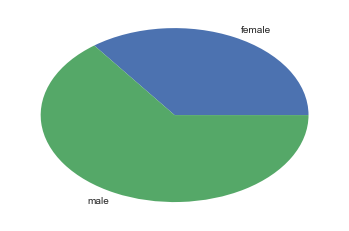

In [26]:
female_ratio= (file_name['Sex']=='female').mean()
male_ratio= (file_name['Sex']=='male').mean()
file_name['female']=file_name['Sex']=='female'
print plt.pie([female_ratio,male_ratio],labels=['female','male'])
print np.corrcoef(file_name['female'],file_name['Survived'])

从上面数据可以看出，女性存活率达到74%，而男性仅为19%，猜测可能是在发生事故时，男同志舍命竭力保护女同志。相关性较好，为0.54

**根据年龄计算存活率**

age_group
1    0.579710
2    0.393939
3    0.390625
4    0.227273
Name: Survived, dtype: float64


C:\Users\Jin\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Axes(0.125,0.125;0.775x0.755)
[[ 1.         -0.10123238]
 [-0.10123238  1.        ]]


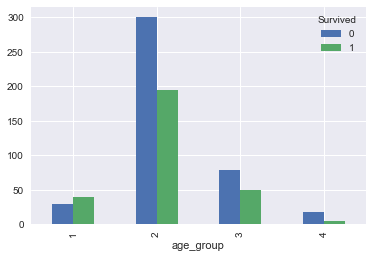

In [27]:
#年龄中存在空缺，所以先进行数据清洗，使用去除空缺后的数据计算，将年龄分为少年1(0-12)，2青年（13-39），3中年(40-59)，4老年(60及以上)
age_file_name=file_name[file_name['Age'].isnull()==0]#使用dropna怎么用？索引怎么变为新的索引？

age_file_name['age_group']=pd.cut(age_file_name['Age'],bins=[0,12,40,60,80],labels=[1,2,3,4])

age_sur_ratio=age_file_name.groupby('age_group').mean()['Survived']

print age_sur_ratio

print age_file_name.groupby(['age_group','Survived'])['Survived'].count().unstack().plot(kind='bar')

print np.corrcoef(age_file_name['age_group'],age_file_name['Survived'])

Axes(0.125,0.125;0.775x0.755)


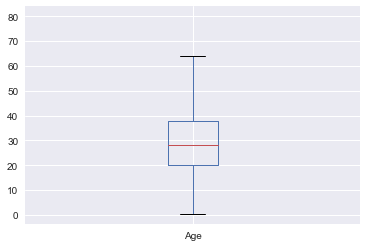

In [28]:
print file_name.boxplot(column='Age')

从箱型图可以看出，中位年龄为29岁左右，从上述分类柱状图可以看出，少年存活比例较高为58%，青年中年都为39%，老年存活率为23%，可能原因是年轻人照顾少年朋友，增加了少年存活比例，而老年人由于年龄限制，体力不支，无法向年轻人一样逃生。综合相关系数-0.1来看，相关性较差。

__根据sibsp和parch计算存活率__

alone_group
alone        0.303538
not_alone    0.505650
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.755)
[[ 1.          0.20336709]
 [ 0.20336709  1.        ]]


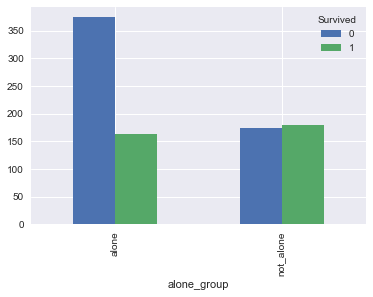

In [29]:
#将没有亲朋好友看作alone,有朋友做伴看作not_alone
file_name['alone']=file_name['SibSp']+file_name['Parch']+1

file_name['alone']=file_name['alone'].apply(lambda x:2 if x>1 else x )#将>1的改为统一数字，以便后续计算相关系数

file_name['alone_group']=pd.cut(file_name['alone'],bins=[0,1,2],labels=['alone','not_alone'])
alone_sur_ratio=file_name.groupby('alone_group').mean()['Survived']

print alone_sur_ratio
print file_name.groupby(['alone_group','Survived'])['Survived'].count().unstack().plot(kind='bar')
print np.corrcoef(file_name['alone'],file_name['Survived'])

由存活率可以看出，独自一人为30%，有好友相伴时存活率增加至51%，可能为有亲友时，亲友互相照顾互相帮助，增加存活率。相关系数为0.2。

__查看票价分布__

print file_name.boxplot(column='Fare')

大多数人选择票价分布在$50以下，有个别人员花费$500票价。

# 结论：

综合考虑席别，年龄，性别，是否单独 的四个因素，可以看出性别与存活率相关性较好，相关系数0.54，计算男女性存活率显著性差异：

__判断男女存活率差异是否显著__

In [30]:
sex_std=file_name.groupby('female').std()['Survived']#根据是否为女性分类，求出标准差
female_std=sex_std[True]#女性标准差
male_std=sex_std[False]#男性标准差

sex_population=file_name.groupby('Sex').count()['Survived']#根据sex分类，求每个分类的个数
female_len=sex_population['female']#女性总数
male_len=sex_population['male']#男性总数

female_mean = sex_sur_ratio['female']#女性均值
male_mean = sex_sur_ratio['male']#男性均值

z_sex=(female_mean-male_mean)/(np.sqrt((female_std**2/female_len)+(male_std**2/male_len)))#求出标准分

print z_sex

18.6718331773


可以看出，标准分为18.7,根据z分表可知，概率小于0.01，差异显著，并非偶然差异，因此得出结论：总体中女性存活率大于男性。

说明：
- 只可以得到相关性，而不能得到因果性
- 未分析所在船舱与生存率之间的关系